<a href="https://colab.research.google.com/github/dudberoll/ML/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом домашнем задании вам предстоит с помощью Pandas ответить на несколько вопросов об этом [датасете](https://archive.ics.uci.edu/ml/datasets/Adult). Все ответы вам предстоит отправить в этой [форме](https://forms.gle/qfVth9BygS4AVJZ47)

Чтобы начать надо сохранить этот ноутбук себе на диск (File - Save a copy in Drive) или скачать (File - Download), если вы делаете у себя локально. 

Скачать нужный датасет можно [тут](https://disk.yandex.ru/d/6WlIXR-y_PObLg)

Эта домашняя работа легкая и покрывает лишь некоторую базу, очень советую пройтись по доп.материалам и посмотреть на различные крутые штуки, которые может делать Pandas, Matplotlib или Seaborn. Особенно если вы хотите заниматься анализом данных намного серьезнее.

Мягкий дедлайн: 31 октября 23:59 \
Жесткий дедлайн: 7 ноября 23:59

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

plt.rcParams["figure.figsize"] = (18, 10)

**Задание 0: Прочитайте скачанный датасет и выведите его**

In [ ]:
# Write code here
data = pd.read_csv('adult_data.csv')
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Задание 1: Найдите количество мужчин и количество женщин в датасете**

In [ ]:
# Write code here
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**Задание 2: Найдите средний возраст мужчин**

In [ ]:
# Write code here
data_male = data[data['sex'] == 'Male'].copy()
data_male['age'].mean()
np.mean(data_male)

count    21790.000000
mean        39.433547
std         13.370630
min         17.000000
25%         29.000000
50%         38.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

**Задание 3: Найдите процент людей, которые являются гражданами Тайваня (Taiwan)**

In [ ]:
# Write code here

df1 = data[data['native-country'] == 'Taiwan']
print((df1.count()/data.count()*100.0)['age'])


0.1566290961579804


**Задание 4: Найдите среднее значение возраста для людей, которые зарабатывают >50K**

In [ ]:
# Write code here
data4 = data[data['salary'] == '>50K']
np.mean(data4['age'])



44.24984058155847

**Задание 5: Найдите стандартное отклонение возраста для людей, которые зарабатывают >50K**

In [ ]:
# Write code here
#st.stdev(data['age'])
np.std(data['age'])

13.640223092304275

**Задание 6: Проверьте, правда ли что все люди, которые зарабытвают >50K, имеют образование Bachelors+**

In [ ]:
# Write code here
data6 = data[data['salary'] == '>50K'].copy()
if (data6[data6['education-num'] >= 14 ].count()['age']) == data6.count()['age']:
  print('True')
else:
  print('false')

false


**Задание 7: Сколько человек, работающих 40 часов и являющихся гражданами США (United-States), зарабатывают <=50K**

In [ ]:
# Write code here
data7 = data[(data['hours-per-week'] == 40) & (data.salary == '<=50K') & (data['native-country'] == 'United-States')]
len(data7)


10493

**Задание 8: Теперь чуть сложнее. Давайте найдем максимальное количество часов в неделю (hours-per-week), посмотрим, сколько человек работают столько времени в неделю, а потом посмотрим, сколько человек зарабатывают <50K**

In [ ]:
# Write code here
hour = data['hours-per-week'].max()
data8 = data[(data['hours-per-week'] == hour) & (data['salary'] == '<=50K')]
data8.count()

age               60
workclass         60
fnlwgt            60
education         60
education-num     60
marital-status    60
occupation        60
relationship      60
race              60
sex               60
capital-gain      60
capital-loss      60
hours-per-week    60
native-country    60
salary            60
dtype: int64

**Задание 9: В этом задании вам предстоит построить ваш первый график. Ответьте на вопрос: людей с каким образованием больше всего представленно в датасете? \
P.S Использовать можно matplotlib, seaborn, plotly**

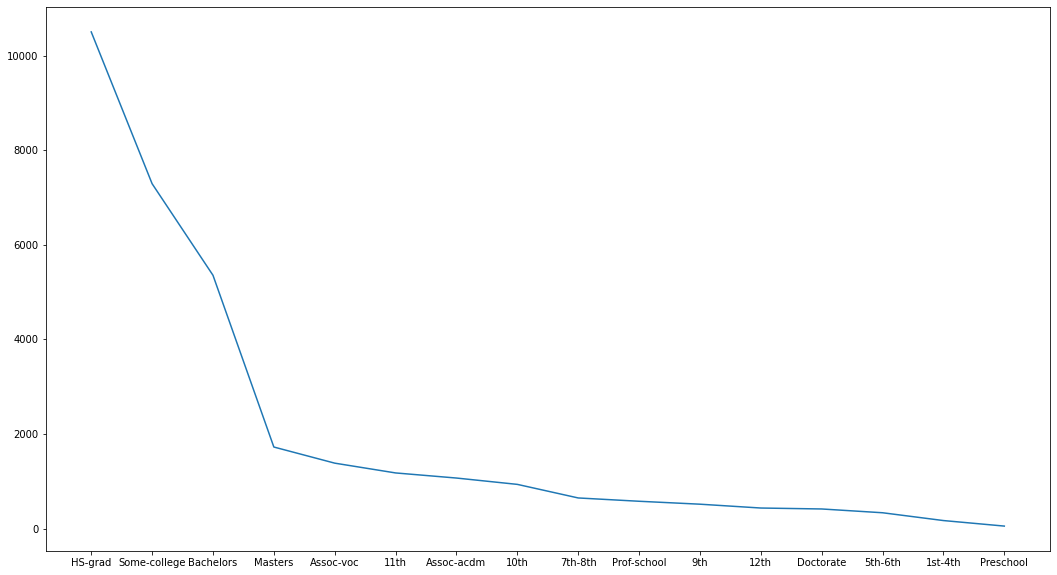

In [ ]:
# Write code here
data['education'].value_counts()

plt.plot(data['education'].value_counts())

**Задание 10: А теперь давайте посмотрим на распределение возрастов. Сколько возрастных отрезков имеют больше 1600 значений? (Одним "отрезков" является один столбец при стандартных настройках seaborn/matplotlib)**

(array([395., 550., 712., 753., 720., 765., 877., 798., 841., 785., 835.,
        867., 813., 861., 888., 828., 875., 886., 876., 898., 858., 827.,
        816., 794., 808., 780., 770., 724., 734., 737., 708., 543., 577.,
        602., 595., 478., 464., 415., 419., 366., 358., 366., 355., 312.,
        300., 258., 230., 208., 178., 150., 151., 120., 108.,  89.,  72.,
         67.,  64.,  51.,  45.,  46.,  29.,  23.,  22.,  22.,  20.,  12.,
          6.,  10.,   3.,   1.,   1.,   3.]),
 array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 72 Patch objects>)

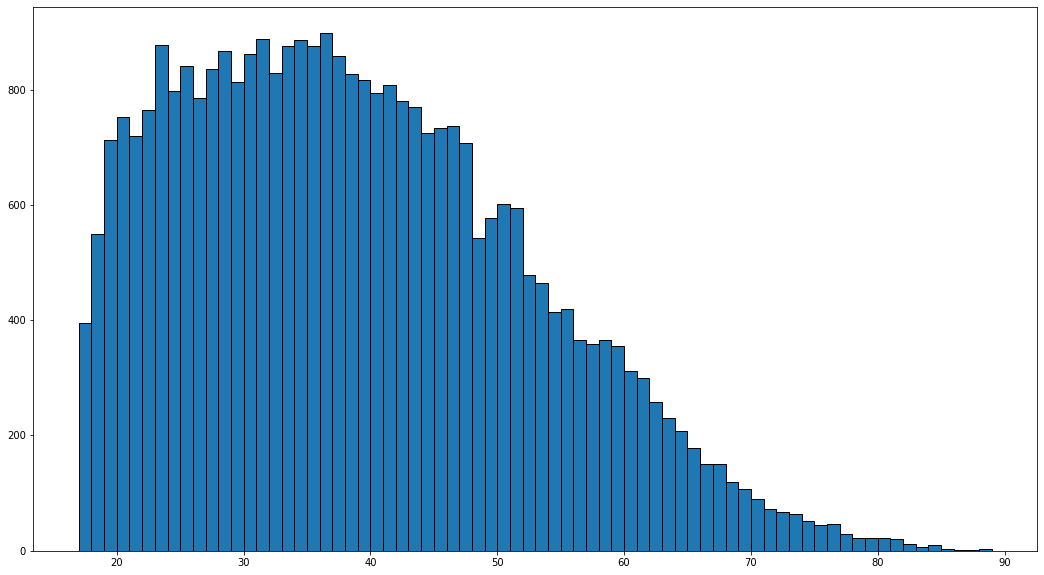

In [ ]:
# Write code here
plt.hist(data['age'],bins = [i for i in range(data['age'].min(),data['age'].max(),1)], edgecolor='black')